## <font size=5> <strong>Heart Disease Prediction using an Ensemble Learning
Rahul Kumar, M.tech AI, NIT Silchar



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## I. Importing essential libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


## II. Importing and understanding our dataset

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/ML_DL projects mtech 3rd sem/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [4]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [5]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [6]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0


#### Description

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [11]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [12]:
# Assuming you have a dataset named 'dataset'
# You can use the 'zip' function to iterate over both the column names and descriptions together.

info = [
    "age",
    "1: male, 0: female",
    "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
    "resting blood pressure",
    "serum cholestoral in mg/dl",
    "fasting blood sugar > 120 mg/dl",
    "resting electrocardiographic results (values 0,1,2)",
    "maximum heart rate achieved",
    "exercise-induced angina",
    "oldpeak = ST depression induced by exercise relative to rest",
    "the slope of the peak exercise ST segment",
    "number of major vessels (0-3) colored by fluoroscopy",
    "thal: 3 = normal; 6 = fixed defect; 7 = reversible defect"
]

# Assuming you have a 'dataset' with columns that correspond to the 'info' list
for column_name, description in zip(dataset.columns, info):
    print(f"{column_name}:\t\t\t{description}")


age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			maximum heart rate achieved
exang:			exercise-induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by fluoroscopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversible defect


#### Analysing the 'target' variable

In [13]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [14]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [15]:
# We have a DataFrame named 'dataset' and a "target" column
correlations = dataset.corr()["target"].abs().sort_values(ascending=False)
print(correlations)


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


####This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

Class 0 Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  138.000000  138.000000  138.000000  138.000000  138.000000  138.000000   
mean    56.601449    0.826087    0.478261  134.398551  251.086957    0.159420   
std      7.962082    0.380416    0.905920   18.729944   49.454614    0.367401   
min     35.000000    0.000000    0.000000  100.000000  131.000000    0.000000   
25%     52.000000    1.000000    0.000000  120.000000  217.250000    0.000000   
50%     58.000000    1.000000    0.000000  130.000000  249.000000    0.000000   
75%     62.000000    1.000000    0.000000  144.750000  283.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  409.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  138.000000  138.000000  138.000000  138.000000  138.000000  138.000000   
mean     0.449275  139.101449    0.550725    1.585507    1.166667    1.166667   
std    

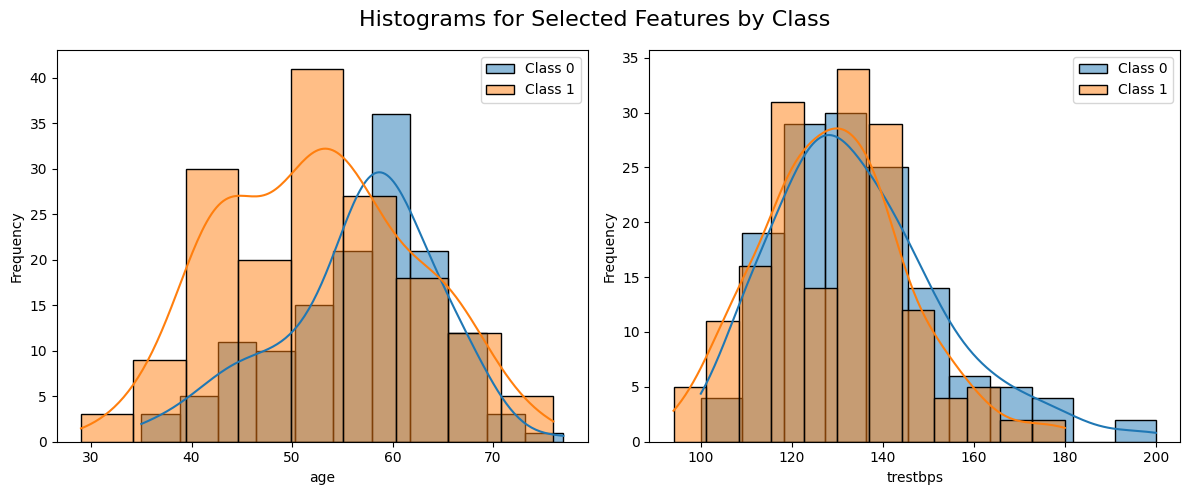

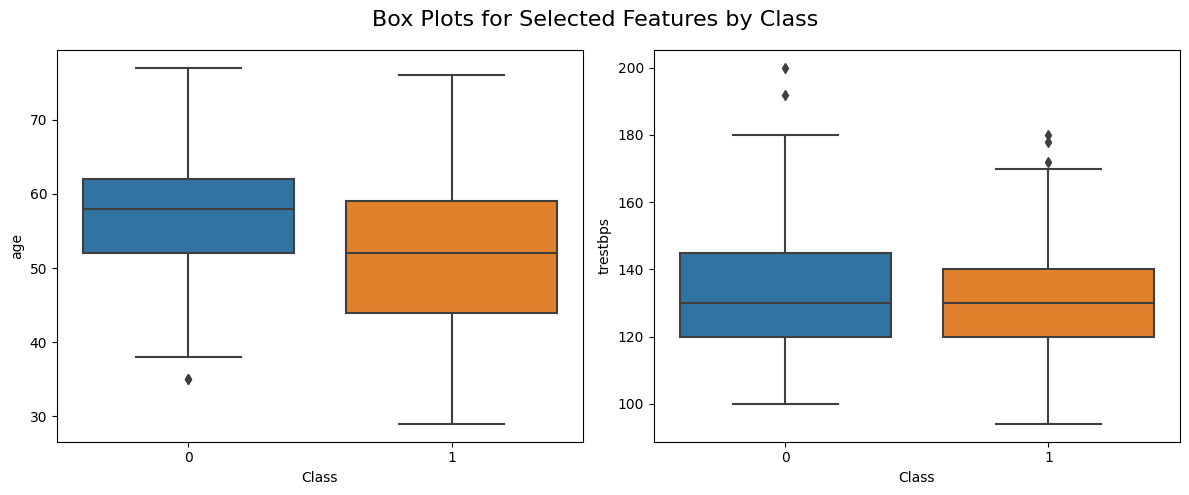

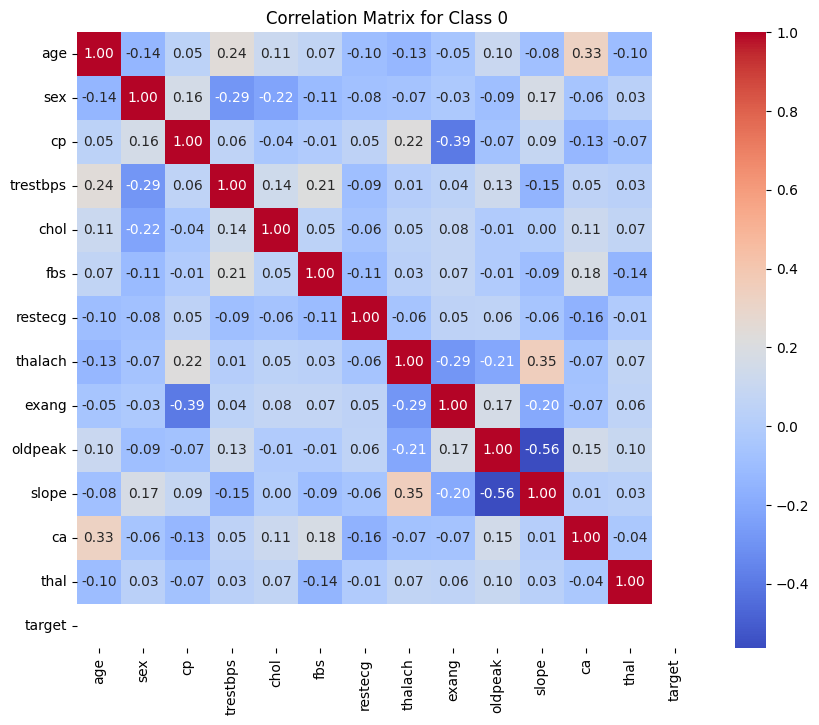

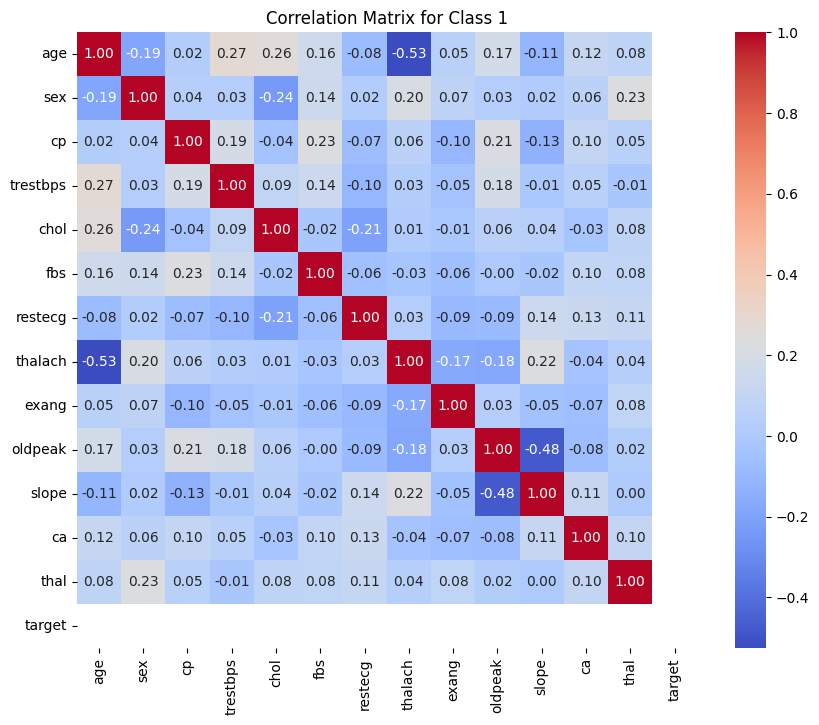

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with a "target" column

# Separate the data into class 0 and class 1
class_0_data = dataset[dataset["target"] == 0]
class_1_data = dataset[dataset["target"] == 1]

# Basic statistics for class 0
print("Class 0 Statistics:")
print(class_0_data.describe())

# Basic statistics for class 1
print("\nClass 1 Statistics:")
print(class_1_data.describe())

# Histograms for selected features (e.g., age, trestbps)
selected_features = ["age", "trestbps"]

plt.figure(figsize=(12, 5))
plt.suptitle("Histograms for Selected Features by Class", fontsize=16)

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(class_0_data[feature], label="Class 0", kde=True)
    sns.histplot(class_1_data[feature], label="Class 1", kde=True)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

# Box plots for selected features
plt.figure(figsize=(12, 5))
plt.suptitle("Box Plots for Selected Features by Class", fontsize=16)

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x="target", y=feature, data=dataset)
    plt.xlabel("Class")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Correlation matrix for class 0
correlation_matrix_class_0 = class_0_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_class_0, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Class 0")
plt.show()

# Correlation matrix for class 1
correlation_matrix_class_1 = class_1_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_class_1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Class 1")
plt.show()


1    165
0    138
Name: target, dtype: int64


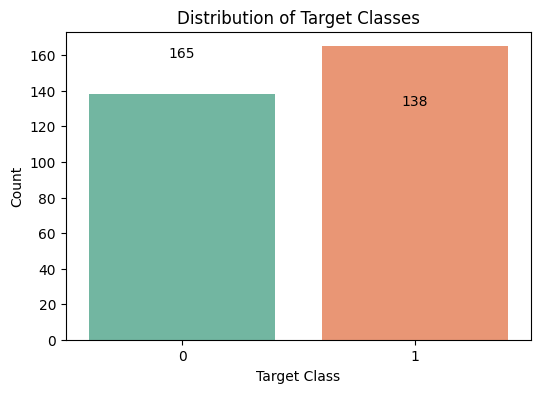

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# We have a DataFrame named 'dataset' with a "target" column

# Count the occurrences of each target class
target_counts = dataset["target"].value_counts()
print(target_counts)

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="Set2")
#palette="Set2" sets the color palette for the bars in the plot.

# Add labels and title
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.title("Distribution of Target Classes")

# Add count values above the bars
for index, value in enumerate(target_counts):
    plt.text(index, value, str(value), ha="center", va="top")

plt.show()




In [45]:
# Assuming you have already computed the target_temp variable using value_counts()
total_patients = len(dataset)  # Total number of patients in the dataset

# Calculate the percentage of patients without heart problems (class 0)
percentage_class_0 = (target_temp[0] / total_patients) * 100

# Calculate the percentage of patients with heart problems (class 1)
percentage_class_1 = (target_temp[1] / total_patients) * 100

# Print the percentages
print("Percentage of patients without heart problems: " + str(round(percentage_class_0, 2)) + "%")
print("Percentage of patients with heart problems: " + str(round(percentage_class_1, 2)) + "%")


Percentage of patients without heart problems: 45.54%
Percentage of patients with heart problems: 54.46%


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [46]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

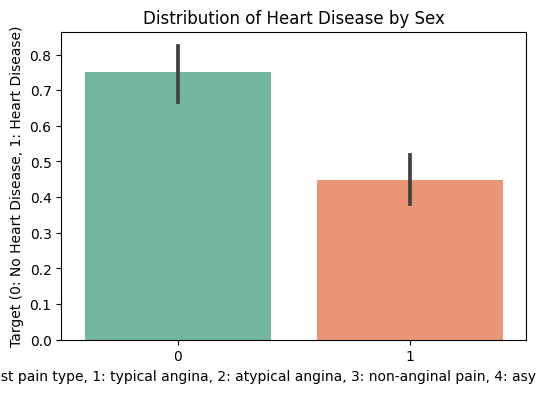

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with "sex" and "target" columns

# Create a bar plot to visualize the distribution of "sex" with respect to the target variable
plt.figure(figsize=(6, 4))
sns.barplot(x="sex", y="target", data=dataset, palette="Set2", hue_order=[0, 1])

# Add labels and a title
plt.xlabel("chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic")
plt.ylabel("Target (0: No Heart Disease, 1: Heart Disease)")
plt.title("Distribution of Heart Disease by Sex")

plt.show()


##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

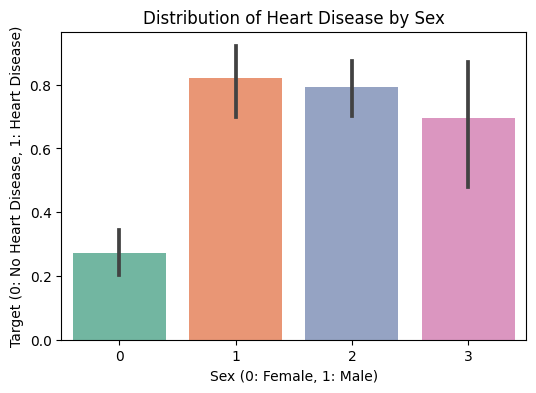

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with "sex" and "target" columns

# Create a bar plot to visualize the distribution of "sex" with respect to the target variable
plt.figure(figsize=(6, 4))
sns.barplot(x="cp", y="target", data=dataset, palette="Set2", hue_order=[0, 1])

# Add labels and a title
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Target (0: No Heart Disease, 1: Heart Disease)")
plt.title("Distribution of Heart Disease by Sex")

plt.show()

In [54]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

In [55]:
sns.barplot(dataset["cp"],y)

TypeError: ignored

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [ ]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].unique()

array([1, 0])

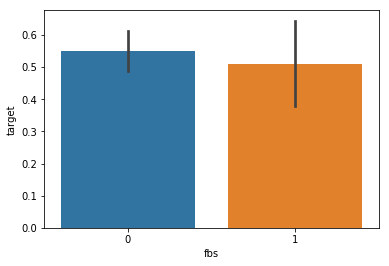

In [ ]:
sns.barplot(dataset["fbs"],y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

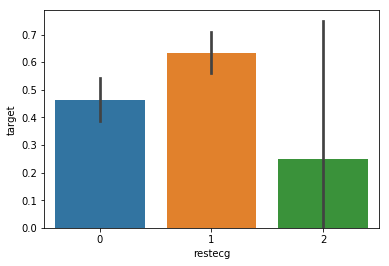

In [ ]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [ ]:
dataset["exang"].unique()

array([0, 1])

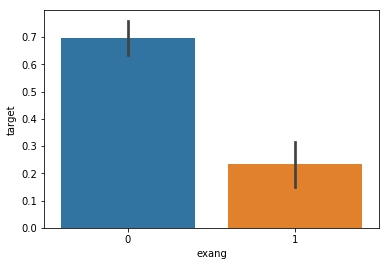

In [ ]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [ ]:
dataset["slope"].unique()

array([0, 2, 1])

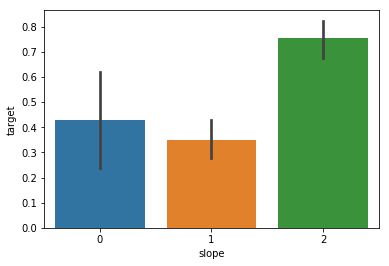

In [ ]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [ ]:
#number of major vessels (0-3) colored by flourosopy

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

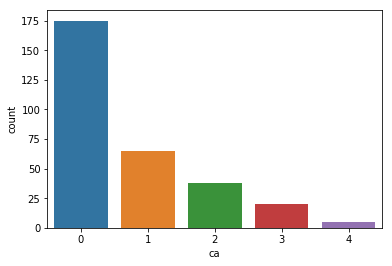

In [ ]:
sns.countplot(dataset["ca"])

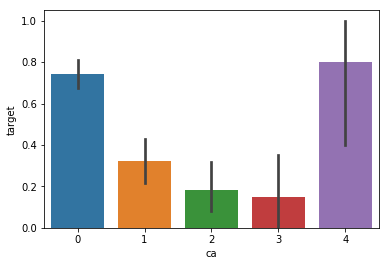

In [ ]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

In [ ]:
### Analysing the 'thal' feature

In [ ]:
dataset["thal"].unique()

array([1, 2, 3, 0])

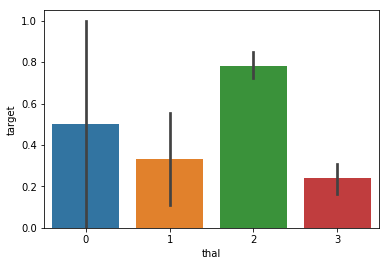

In [ ]:
sns.barplot(dataset["thal"],y)

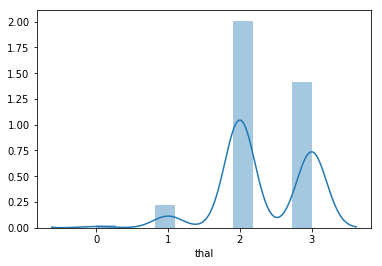

In [ ]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

## V. Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(61,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(61,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(61,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

(61,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 95.08 %


### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(61,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 85.25 %


### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
242/242 [==============================] - 3s 10ms/step - loss: 4.7817 - acc: 0.6074
Epoch 2/300
242/242 [==============================] - 0s 123us/step - loss: 2.6633 - acc: 0.6033
Epoch 3/300
242/242 [==============================] - 0s 124us/step - loss: 2.3371 - acc: 0.6281
Epoch 4/300
242/242 [==============================] - 0s 127us/step - loss: 2.2938 - acc: 0.6488
Epoch 5/300
242/242 [==============================] - 0s 127us/step - loss: 2.0712 - acc: 0.6860
Epoch 6/300
242/242 [==============================] - 0s 125us/step - loss: 2.0645 - acc: 0.6653
Epoch 7/300
242/242 [==============================] - 0s 124us/step - loss: 2.0023 - acc: 0.6860
Epoch 8/300
242/242 [==============================] - 0s 127us/step - loss: 1.9928 - acc: 0.6694
Epoch 9/300
242/242 [==============================] - 0s 129us/step - loss: 1.9670 - acc: 0.6694
Epoch 10/300
242/242 [==============================] - 0s 123us/step - loss: 1.9316 - acc: 0.6736
Epoch 11/300
242/242

In [ ]:
Y_pred_nn = model.predict(X_test)

In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 80.33 %


## VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 95.08 %
The accuracy score achieved using XGBoost is: 85.25 %
The accuracy score achieved using Neural Network is: 80.33 %


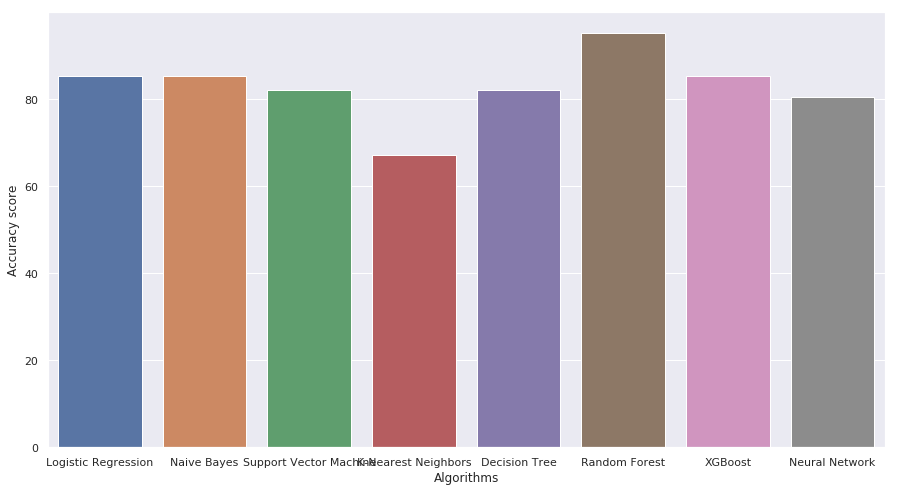

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>